## helloworld

In [3]:
import tensorflow as tf

In [14]:
# 定义常量
hello = tf.constant("Hello TensorFlow")
#  使用tf创建会话
sess = tf.Session()
# 运行
print(sess.run(hello))
# 关闭会话
sess.close()

b'Hello TensorFlow'


In [15]:
a = tf.constant(100)
sess = tf.Session()
print(sess.run(a))
sess.close()

100


## 基本操作

### 声明常量进行运算


In [17]:
a = tf.constant(2)
b = tf.constant(3)

# 启动默认的流图 graph
with tf.Session() as sess:
    print(sess.run(a), sess.run(b))
    print(sess.run(a+b))
    print(sess.run(a*b))
    print(sess.run(10*a + 7*b))

2 3
5
6
41


### 声明占位符进行运算  placeholder


In [33]:
# 声明占位符, 定义数据类型
a = tf.placeholder(tf.int32)
b = tf.placeholder(tf.int32)
c = tf.placeholder(tf.int32)
# 声明矩阵, 使用numpy 生成矩阵需要定义 dtype=float
matrix1 = tf.constant([[3., 3.]])
matrix2 = tf.constant([[2.], [2.]])

# 定义操作，原理图中的运算操作
add = tf.add(a, b)
mul = tf.multiply(a, b)
div = tf.divide(a, b)
sub = tf.subtract(a, b)
# 矩阵乘法
product = tf.matmul(matrix1, matrix2)
p = tf.add(matrix1, matrix2)
# 普通乘法
mul_ = tf.multiply(matrix1, matrix2)

# 启动 graph 进行操作
with tf.Session() as sess:
    print(sess.run(add, feed_dict={a: 2, b: 4, c:4}))
    print(sess.run(mul, feed_dict={a: 2, b: 4}))
    print(sess.run(div, feed_dict={a: 10, b: 2}))
    print(sess.run(sub, feed_dict={a: 100, b: 4}))
    
    print(sess.run(product))
    print(sess.run(p))
    print(sess.run(mul_))


6
8
5.0
96
[[12.]]
[[5. 5.]
 [5. 5.]]
[[6. 6.]
 [6. 6.]]


### 模拟进行线性运算

Epoch: 0050 cost=1.304302573 W= 0.40750524 b= 0.15714133
Epoch: 0100 cost=1.240441799 W= 0.38318485 b= 0.3382053
Epoch: 0150 cost=1.204714537 W= 0.3648101 b= 0.47500426
Epoch: 0200 cost=1.184868455 W= 0.3509274 b= 0.5783602
Epoch: 0250 cost=1.173954248 W= 0.34043866 b= 0.65644836
Epoch: 0300 cost=1.168037057 W= 0.33251405 b= 0.7154467
Epoch: 0350 cost=1.164895892 W= 0.32652676 b= 0.76002157
Epoch: 0400 cost=1.163281441 W= 0.32200322 b= 0.793699
Epoch: 0450 cost=1.162494898 W= 0.3185855 b= 0.819144
Epoch: 0500 cost=1.162147760 W= 0.31600326 b= 0.83836836
Epoch: 0550 cost=1.162026763 W= 0.31405246 b= 0.852892
Epoch: 0600 cost=1.162015915 W= 0.31257856 b= 0.8638651
Epoch: 0650 cost=1.162053704 W= 0.31146497 b= 0.87215585
Epoch: 0700 cost=1.162108421 W= 0.31062365 b= 0.87841934
Epoch: 0750 cost=1.162164927 W= 0.30998796 b= 0.8831517
Epoch: 0800 cost=1.162216067 W= 0.30950773 b= 0.8867274
Epoch: 0850 cost=1.162259579 W= 0.30914474 b= 0.88942987
Epoch: 0900 cost=1.162295222 W= 0.3088706 b= 0

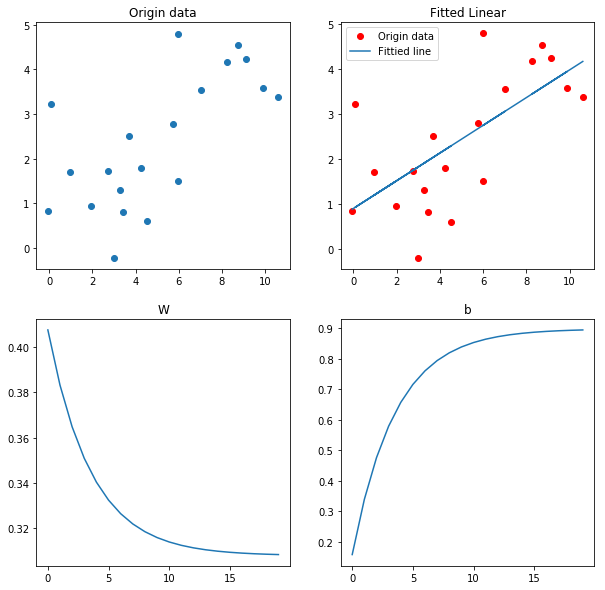

In [72]:

import numpy as np 
import tensorflow as tf
import matplotlib.pyplot as plt

rng = np.random

# 参数设定
learning_rate = 0.01
training_ecochs = 1000
display_step = 50

# 生成训练数据
train_X = np.linspace(0,10, num=20) + np.random.randn(20)
train_Y = np.linspace(1,4, num=20) + np.random.randn(20)
n_samples = train_X.shape[0]
# 查看数据的关系， 线性关系
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.scatter(train_X, train_Y)
plt.title("Origin data")

# 定义 tensorflow 参数， 
# 输入
X = tf.placeholder("float")
Y = tf.placeholder("float")
# 定义变量参数，斜率和截距
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# 创建线性模型
y_pred = tf.add(tf.multiply(X, W), b)

# 创建TensorFlow均方误差 cost,以及梯度下降优化器 optimizer
# 均方误差,平局误差， 比较真实数据和预测数据的差距， 以求和的方式来降低维度
cost = tf.reduce_sum(tf.pow(y_pred - Y, 2)) / n_samples

# 梯度下降，每次下降learning_rate,寻找最小的均方误差
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

# tensorflow 初始化
init = tf.global_variables_initializer()
# 训练开始
with tf.Session() as sess:
    sess.run(init)
    w_list = []
    b_list = []
    # 训练所有数据, 1000次
    for epoch in range(training_ecochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X:x, Y:y})
            
        # 每执行 50 次显示结果
        if (epoch + 1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
            w_ = sess.run(W)
            b_ = sess.run(b)
            w_list.append(w_)
            b_list.append(b_)
            print("Epoch: %04d" % (epoch + 1), "cost={:.9f}".format(c),
                 "W=", w_, "b=", b_)
    
    print("执行结束！")
    training_cost =sess.run(cost, feed_dict={X: train_X, Y:train_Y})
    print("结果： cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')
    
    # 可视化
    
    plt.subplot(222)
    plt.plot(train_X, train_Y, 'ro', label="Origin data")
    plt.plot(train_X, sess.run(W)*train_X+sess.run(b), label="Fittied line")
    plt.legend()
    plt.title("Fitted Linear")
    
    plt.subplot(223)
    plt.plot(w_list)
    plt.title("W")
    
    plt.subplot(224)
    plt.plot(b_list)
    plt.title("b")
    